Seed set to 42


2024-04-16 22:15:30 | INFO |    OS: Windows
2024-04-16 22:15:30 | INFO |    Loading training SMILES data.


100%|██████████| 1511811/1511811 [00:19<00:00, 77694.30it/s]


2024-04-16 22:15:54 | INFO |    Data size: torch.Size([1511811, 102])

2024-04-16 22:15:54 | INFO |    Loading validation SMILES data.


100%|██████████| 79570/79570 [00:00<00:00, 84492.72it/s]


2024-04-16 22:15:55 | INFO |    Data size: torch.Size([79570, 102])

2024-04-16 22:15:55 | INFO |    Shows the initial molecular SMILES of the training data.
2024-04-16 22:15:55 | INFO |    CCc1nc2cc(Cl)ccn2c1C(=O)NCc1ccc(OCc2ccc(OC(F)(F)F)cc2)cc1
2024-04-16 22:15:55 | INFO |    Convert to token.
2024-04-16 22:15:55 | INFO |    tensor([ 1,  8,  8, 12,  5, 14, 12,  6, 12, 12,  3,  8, 13,  4, 12, 12, 14,  6,
        12,  5,  8,  3,  7, 11,  4, 10,  8, 12,  5, 12, 12, 12,  3, 11,  8, 12,
         6, 12, 12, 12,  3, 11,  8,  3,  9,  4,  3,  9,  4,  9,  4, 12, 12,  6,
         4, 12, 12,  5,  2])
2024-04-16 22:15:55 | INFO |    [' ', '!', '?', '(', ')', '1', '2', '=', 'C', 'F', 'N', 'O', 'c', 'l', 'n', '3', '4', '5', '-', 'S', 'H', '[', ']', 'o', 'B', 'r', '6', '7', '#', 's', '+', 'i', 'I', 'P', 'e', '8', '9', '%', '0', 'p', 'b']


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | loss_func | CrossEntropyLoss | 0     
1 | model     | SmilesVAE        | 3.4 M 
-----------------------------------------------
3.4 M     Trainable params
0         Non-trainable params
3.4 M     Total params
13.731    Total estimated model params size (MB)
Epoch 10: 100%|██████████| 11811/11811 [08:12<00:00, 24.00it/s, loss=9.104, val_loss=9

2024-04-16 23:37:10 | INFO |    Training Finished!!!
2024-04-16 23:37:12 | INFO |    success rate: 0.747
2024-04-16 23:37:12 | INFO |    Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-16 23:37:12 | INFO |    Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


AttributeError: 'DataFrame' object has no attribute 'iloc'

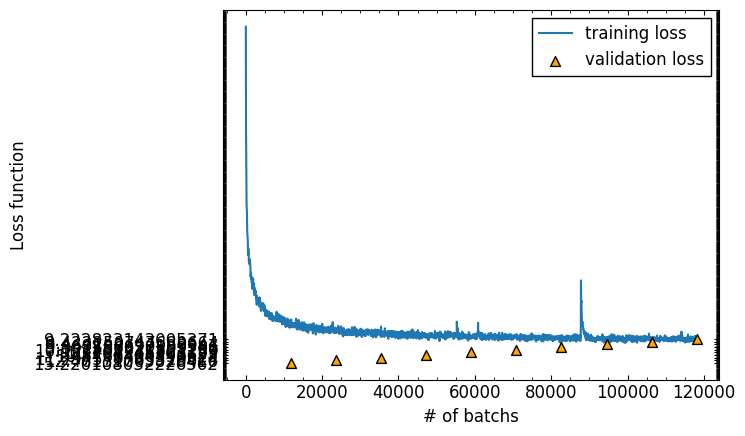

In [1]:
import warnings
from smiles_vae import train

warnings.simplefilter("ignore")

train.main(config_filepath="./configs/setting.yaml")

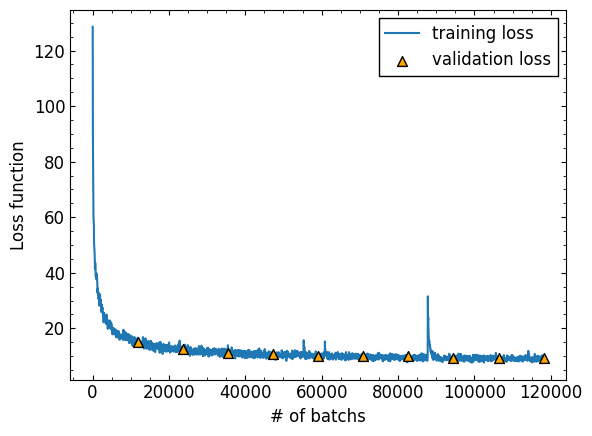

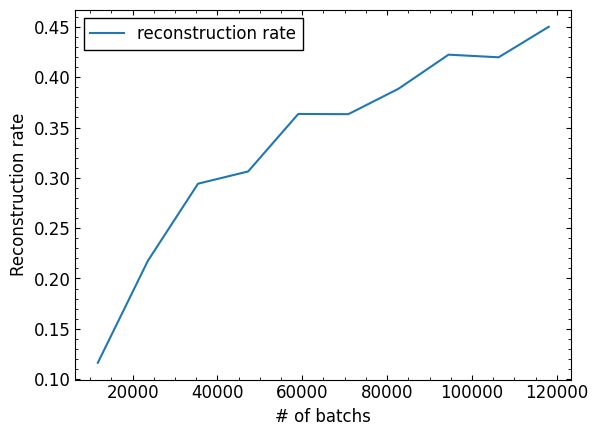

In [9]:
import polars as pl
import os
from smiles_vae import plot

training_dir = "./reports/training"
img_dir = "./reports/images"

metrics_df = pl.read_csv(
    os.path.join(training_dir, "version_0/metrics.csv")
)
train_loss = metrics_df.select("step", "train_loss_step").drop_nulls().cast(dtypes=pl.Float32)
valid_loss = metrics_df.select("step", "valid_loss").drop_nulls().cast(dtypes=pl.Float32)
reconstruction_rate = metrics_df.select(
    "step", "success_rate"
).drop_nulls().cast(dtypes=pl.Float32)
plot.plot_minibatch_loss(train_loss, valid_loss, img_dir)
plot.plot_reconstruction_rate(reconstruction_rate, img_dir)

In [7]:
metrics_df.select("success_rate").drop_nulls().cast(dtypes=pl.Float32)

success_rate
f32
0.116262
0.217683
0.294181
0.306334
0.363441
0.363252
0.38845
0.422358
0.419744
